Se auto to notebook prospathisa na problepso tin troxia tou X Coordinate!!!!
- η διαφορα του με το 5_XYZ_only_norm ειναι οτι to normalization εχει boundaries για καθε row.
- Σε αυτο θα βρω τα συνολικα xminmax, yminmax, zminmax και θα χρησιμοποιησω αυτα.

# Generate Dataframe

In [1]:
import numpy as np
from pathlib import Path
import sys
sys.path.insert(0, "C:\\Users\\geork\\projects\\AIThesis\\src\\src")

from  dataset_reader import DatasetFromFiles

In [2]:
path = Path("C:\\Users\\geork\\projects\\AIThesis\\datasets\\20240510\\mlres")
out_path = Path("C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\crash_xyz_coordinate_timeseries.csv")
# Check if out_path already exists
if out_path.exists():
    print(f"The file or directory {out_path} already exists.")
    # Handle the case where the file already exists, if needed
else:
    # Proceed with your operations
    r = DatasetFromFiles(path)
    r.setTimeSeriesLabel("Head_X_Coordinate")
    r.setTimeSeriesLabel("Head_Y_Coordinate")
    r.setTimeSeriesLabel("Head_Z_Coordinate")
    r.setOutputPath(out_path, True)
    r.read()

The file or directory C:\Users\geork\projects\AIThesis\src\analysis\ThesisChapters\5_4\crash_xyz_coordinate_timeseries.csv already exists.


In [3]:
from dataset_reader import DatasetReaderCSV
path = Path("C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\crash_xyz_coordinate_timeseries.csv")
reader = DatasetReaderCSV(path)
reader.read()
df = reader.convert_to_dataframe()
df.iloc[0]

Id                                                                                          0
Path                                        C:\Users\geork\projects\AIThesis\datasets\2024...
CarProfile                                                                                FCR
Velocity                                                                                  100
Translation                                                                              -200
Rotation                                                                                    0
Position                                                                              initial
HIC15_max                                                                              86.843
HIC36_max                                                                             136.373
Head_Z_Acceleration_abs_max                                                            36.081
Head_X_Acceleration_abs_max                                 

In [4]:
import ast

def str_to_list(s):
    return ast.literal_eval(s)

df["Head_X_Coordinate"] = df["Head_X_Coordinate"].apply(str_to_list)
df["Head_Y_Coordinate"] = df["Head_Y_Coordinate"].apply(str_to_list)
df["Head_Z_Coordinate"] = df["Head_Z_Coordinate"].apply(str_to_list)

In [5]:
from car_profile_expand import expand_car_profiles
df = df.drop(columns=["Path", "Id", "HIC15_max", "HIC36_max",
                      "Head_X_Acceleration_abs_max",
                      "Head_Y_Acceleration_abs_max",
                      "Head_Z_Acceleration_abs_max",
                      "BrIC_abs_max",
                      "Chest_Resultant_Acceleration_max",
                      "Chest_Resultant_Acceleration_CLIP3ms_max",
                      "Position"],
                    errors="ignore")
df = df.reset_index(drop=True)
try:
    df = df.apply(expand_car_profiles, axis=1)
except:
    pass

df = df.drop(columns="CarProfile", errors="ignore")
new_order = ["Velocity", 
             "Translation", 
             "Rotation", 
             "Bumber_Height",
             "Front_Hood_Height", 
             "Bumber_Hood_Angle",
             "Hood_Length", 
             "Back_Hood_Height",  
             "Head_X_Coordinate", 
             "Head_Y_Coordinate", 
             "Head_Z_Coordinate"
             ]
df = df[new_order]
#df = df.sample(frac=1).reset_index(drop=True)
df

,Velocity,Translation,Rotation,Bumber_Height,Front_Hood_Height,Bumber_Hood_Angle,Hood_Length,Back_Hood_Height,Head_X_Coordinate,Head_Y_Coordinate,Head_Z_Coordinate
0,100,-200,0,770,740,16,1150,980,"[220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220...","[-288.045, -288.045, -288.045, -288.045, -288....","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1,100,-200,120,770,740,16,1150,980,"[334.04, 334.04, 334.04, 334.04, 334.04, 334.0...","[-90.522, -90.522, -90.522, -90.522, -90.522, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
2,100,-200,150,770,740,16,1150,980,"[285.841, 285.841, 285.841, 285.841, 285.841, ...","[-42.323, -42.323, -42.323, -42.323, -42.323, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
3,100,-200,180,770,740,16,1150,980,"[220.0, 220.0, 220.0, 220.0, 220.0, 220.0, 220...","[-24.681, -24.681, -24.681, -24.681, -24.681, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
4,100,-200,210,770,740,16,1150,980,"[154.159, 154.159, 154.159, 154.159, 154.159, ...","[-42.323, -42.323, -42.323, -42.323, -42.323, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
...,...,...,...,...,...,...,...,...,...,...,...
1181,80,400,300,580,900,11,1160,1130,"[113.96, 113.96, 113.96, 113.96, 113.96, 113.9...","[377.796, 377.796, 377.796, 377.796, 377.796, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1182,80,400,30,580,900,11,1160,1130,"[293.841, 293.841, 293.841, 293.841, 293.841, ...","[329.597, 329.597, 329.597, 329.597, 329.597, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1183,80,400,330,580,900,11,1160,1130,"[162.159, 162.159, 162.159, 162.159, 162.159, ...","[329.597, 329.597, 329.597, 329.597, 329.597, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."
1184,80,400,60,580,900,11,1160,1130,"[342.04, 342.04, 342.04, 342.04, 342.04, 342.0...","[377.796, 377.796, 377.796, 377.796, 377.796, ...","[1575.416, 1575.411, 1575.396, 1575.391, 1575...."


In [6]:
from tqdm import tqdm

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Checking rows", unit="row"):
    if (len(row["Head_X_Coordinate"]) != 301): print("Error!!")
    if (len(row["Head_Y_Coordinate"]) != 301): print("Error!!")
    if (len(row["Head_Z_Coordinate"]) != 301): print("Error!!")

Checking rows: 100%|██████████| 1186/1186 [00:00<00:00, 9208.54row/s]



Expanded DataFrame:
     Head_X_Coordinate  Head_Y_Coordinate  Head_Z_Coordinate
0              220.000           -288.045           1575.416
1              220.000           -288.045           1575.411
2              220.000           -288.045           1575.396
3              220.000           -288.045           1575.391
4              220.000           -288.045           1575.377
..                 ...                ...                ...
296           2724.310           -409.036            947.462
297           2738.592           -410.063            948.136
298           2752.923           -411.087            948.848
299           2767.306           -412.109            949.599
300           2781.744           -413.132            950.386

[301 rows x 3 columns]


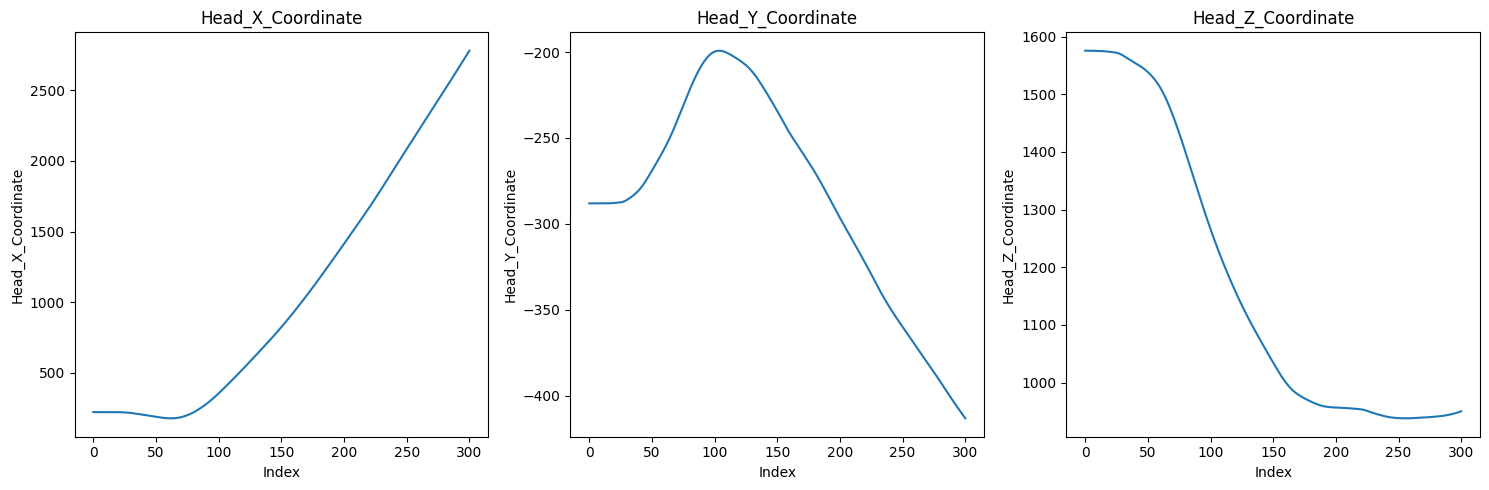

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import random 

def print_plot(df, labels, start, end):
    expanded_data = {label: [] for label in labels}
    
    for label in labels:
        for idx, sublist in enumerate(df[label]):
            for item in sublist:
                expanded_data[label].append(item)
    
    expanded_df = pd.DataFrame(expanded_data)
    print("\nExpanded DataFrame:")
    print(expanded_df[start:end])
    
    fig, axes = plt.subplots(1, len(labels), figsize=(15, 5))
    
    for i, label in enumerate(labels):
        expanded_df[label][start:end].plot(ax=axes[i], title=label)
        axes[i].set_ylabel(label)
        axes[i].set_xlabel('Index')
    
    plt.tight_layout()
    plt.show()

def print_plot_simulation(df, labels, sim_index):
    start = 301 * sim_index
    end   = 301 * sim_index + 301
    print_plot(df, labels, start, end)

def print_plot_random_simulation(df, labels):
    rand_int = random.randint(0, int(df.shape[0]))
    print_plot_simulation(df, labels, rand_int)
    
labels = ["Head_X_Coordinate", "Head_Y_Coordinate", "Head_Z_Coordinate"]
#labels = ["Head_X_Coordinate"]
#print_plot_random_simulation(df, labels)
print_plot_simulation(df, labels, 0)

In [8]:
# split the df in train, test val.
# I want to split it before converting the compact lists into another df,
# so that each simulation will remain unchanged.
import pandas as pd
from sklearn.model_selection import train_test_split

train_size = 0.6
val_size = 0.2
test_size = 0.2

train_df, temp_df = train_test_split(df, train_size=train_size, random_state=13)
val_df, test_df = train_test_split(temp_df, test_size=test_size/(test_size + val_size), random_state=14)

In [9]:
train_df.shape

# To train_df einai (711, 11)
# Kapoies apo tis times tou 11 einai listes me 300 stoixeia.

(711, 11)

# From Dataframe to Numpy Array

## Split Numpy Arrays

In [10]:
def split_dataframe(df, scalar_columns, input_first, output_next):
    # Extract scalar features
    X_scalar = df[scalar_columns].values

    # Extract sequence features (first 75 values)
    X_seq = np.array(
        [
            df['Head_X_Coordinate'].apply(lambda x: x[:input_first]).values.tolist(),
            df['Head_Y_Coordinate'].apply(lambda x: x[:input_first]).values.tolist(),
            df['Head_Z_Coordinate'].apply(lambda x: x[:input_first]).values.tolist()
            ])
    # Transpose X_seq to have shape (num_samples, input_first, 3)
    X_seq = np.transpose(X_seq, (1, 2, 0))

    # Extract target sequences (next 'output_next' values)
    y_seq = np.array([
        df['Head_X_Coordinate'].apply(lambda x: x[input_first:input_first + output_next]).values.tolist(),
        df['Head_Y_Coordinate'].apply(lambda x: x[input_first:input_first + output_next]).values.tolist(),
        df['Head_Z_Coordinate'].apply(lambda x: x[input_first:input_first + output_next]).values.tolist()
                    ])

    # Transpose y_seq to have shape (num_samples, 10, 3)
    y_seq = np.transpose(y_seq, (1, 2, 0))

    # Concatenate scalar features with sequence features
    # Expanding X_scalar to have shape (num_samples, 1, num_features) to concatenate with X_seq
    X_scalar_expanded = np.expand_dims(X_scalar, axis=1)

    # Repeat scalar features to match the sequence length (input_first timesteps)
    X_scalar_repeated = np.repeat(X_scalar_expanded, input_first, axis=1)

    # Concatenate along the feature dimension
    X = np.concatenate([X_scalar_repeated, X_seq], axis=-1)

    # y_train is just the target sequences (y_seq)
    y = y_seq
    return X, y

In [11]:
scalar_columns = ['Velocity', 'Translation', 'Rotation', 'Bumber_Height', 
                'Front_Hood_Height', 'Bumber_Hood_Angle', 
                'Hood_Length', 'Back_Hood_Height']

first_steps = 75
next_steps = 125

X_train, y_train = split_dataframe(train_df, scalar_columns, first_steps, next_steps)
X_test, y_test = split_dataframe(test_df, scalar_columns, first_steps, next_steps)
X_val, y_val = split_dataframe(val_df, scalar_columns, first_steps, next_steps)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

X_train shape: (711, 75, 11), y_train shape: (711, 125, 3)


In [12]:
X_train[0]
X_train[0][0]
X_train.shape


(711, 75, 11)

## Calculate Relative Changes

In [14]:
# Assuming X has shape (711, 75, 11)
def calculate_relative_change_X(X):
    # Split the dataset into two parts: unchanged features and XYZ columns
    features = X[:, :, :-3]  # First 8 columns (unchanged)
    xyz = X[:, :, -3:]  # Last 3 columns (XYZ)

    # Calculate the relative change for XYZ coordinates
    # Shape will be (n_samples, timesteps-1, 3)
    xyz_relative = np.diff(xyz, axis=1)

    # Since np.diff reduces the timestep dimension by 1, we need to pad the first timestep for XYZ
    # We can pad the first timestep with zeros (no relative change at the first timestep)
    zero_padding = np.zeros((X.shape[0], 1, 3))
    xyz_relative = np.concatenate((zero_padding, xyz_relative), axis=1)

    # Combine unchanged features and the new relative XYZ values
    # Shape will be (n_samples, timesteps, 11)
    X_transformed = np.concatenate((features, xyz_relative), axis=2)

    return X_transformed

import numpy as np

def revert_relative_change_X(X_relative, initial_xyz):
    """
    Reverts the relative changes for the last 3 columns (XYZ) to their original absolute values.
    
    Parameters:
    X_relative: np.ndarray
        Input data with relative changes in the last 3 columns (shape: n_samples, timesteps, 11).
    initial_xyz: np.ndarray
        The initial XYZ values (absolute values) at t=0 (shape: n_samples, 3).
    
    Returns:
    X_original: np.ndarray
        The dataset with the last 3 columns (XYZ) reverted to absolute values (shape: n_samples, timesteps, 11).
    """
    # Split the dataset into two parts: unchanged features and relative XYZ columns
    features = X_relative[:, :, :-3]  # First 8 columns (unchanged)
    xyz_relative = X_relative[:, :, -3:]  # Last 3 columns (XYZ relative changes)

    # Initialize an array to store the absolute XYZ values
    n_samples, timesteps, _ = X_relative.shape
    xyz_absolute = np.zeros((n_samples, timesteps, 3))

    # Set the first timestep to the initial absolute XYZ values
    
    xyz_absolute[:, 0, :] = initial_xyz

    # Rebuild the absolute XYZ values by accumulating the relative changes
    for t in range(1, timesteps):
        xyz_absolute[:, t, :] = xyz_absolute[:, t-1, :] + xyz_relative[:, t, :]

    # Combine unchanged features with the reconstructed absolute XYZ values
    X_original = np.concatenate((features, xyz_absolute), axis=2)

    return X_original


def calculate_relative_change_y(y):
    xyz_relative = np.diff(y, axis=1)
    zero_padding = np.zeros((y.shape[0], 1, y.shape[2]))
    y_relative = np.concatenate((zero_padding, xyz_relative), axis=1)
    return y_relative

import numpy as np

def revert_relative_change_y(y_relative, initial_xyz):
    """
    Reverts the relative changes for the test data to their original absolute values.
    
    Parameters:
    y_relative: np.ndarray
        Input test data with relative changes (shape: n_samples, timesteps, 3).
    initial_xyz: np.ndarray
        The initial XYZ values (absolute values) at t=0 (shape: n_samples, 3).
    
    Returns:
    y_absolute: np.ndarray
        The test data with reverted absolute XYZ values (shape: n_samples, timesteps, 3).
    """
    # Initialize an array to store the absolute XYZ values
    n_samples, timesteps, n_features = y_relative.shape
    y_absolute = np.zeros((n_samples, timesteps, n_features))

    # Set the first timestep to the initial absolute XYZ values
    y_absolute[:, 0, :] = initial_xyz

    # Rebuild the absolute XYZ values by accumulating the relative changes
    for t in range(1, timesteps):
        y_absolute[:, t, :] = y_absolute[:, t-1, :] + y_relative[:, t, :]

    return y_absolute


In [15]:
print(f"min/max X_train[:, :, -3]: {X_train[:, :, -3].min()}/{X_train[:, :, -3].max()}")
print(f"min/max X_train[:, :, -2]: {X_train[:, :, -2].min()}/{X_train[:, :, -2].max()}")
print(f"min/max X_train[:, :, -1]: {X_train[:, :, -1].min()}/{X_train[:, :, -1].max()}")

X_train_rel = calculate_relative_change_X(X_train)
X_test_rel = calculate_relative_change_X(X_test)
X_val_rel   = calculate_relative_change_X(X_val)

print(f"min/max X_train[:, :, -3]: {X_train_rel[:, :, -3].min()}/{X_train_rel[:, :, -3].max()}")
print(f"min/max X_train[:, :, -2]: {X_train_rel[:, :, -2].min()}/{X_train_rel[:, :, -2].max()}")
print(f"min/max X_train[:, :, -1]: {X_train_rel[:, :, -1].min()}/{X_train_rel[:, :, -1].max()}")

print(f"min/max y_train[:, :, -3]: {y_train[:, :, -3].min()}/{y_train[:, :, -3].max()}")
print(f"min/max y_train[:, :, -2]: {y_train[:, :, -2].min()}/{y_train[:, :, -2].max()}")
print(f"min/max y_train[:, :, -1]: {y_train[:, :, -1].min()}/{y_train[:, :, -1].max()}")

y_train_rel = calculate_relative_change_y(y_train)
y_test_rel = calculate_relative_change_y(y_test)
y_val_rel  = calculate_relative_change_y(y_val)

print(f"min/max y_train[:, :, -3]: {y_train_rel[:, :, -3].min()}/{y_train_rel[:, :, -3].max()}")
print(f"min/max y_train[:, :, -2]: {y_train_rel[:, :, -2].min()}/{y_train_rel[:, :, -2].max()}")
print(f"min/max y_train[:, :, -1]: {y_train_rel[:, :, -1].min()}/{y_train_rel[:, :, -1].max()}")


min/max X_train[:, :, -3]: 55.897/464.892
min/max X_train[:, :, -2]: -488.226/575.557
min/max X_train[:, :, -1]: 1178.524/1577.81
min/max X_train[:, :, -3]: -6.581000000000017/12.510999999999967
min/max X_train[:, :, -2]: -6.209999999999999/5.605000000000018
min/max X_train[:, :, -1]: -13.857999999999947/0.65300000000002
min/max y_train[:, :, -3]: 11.751/1979.768
min/max y_train[:, :, -2]: -649.235/856.436
min/max y_train[:, :, -1]: 909.385/1624.29
min/max y_train[:, :, -3]: -6.73599999999999/18.153999999999996
min/max y_train[:, :, -2]: -6.425000000000011/5.877999999999986
min/max y_train[:, :, -1]: -18.007000000000062/14.666000000000167


## Normalization preprocessing related

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def feature_wise_normalization(array):
    # Normalize each feature across all samples and timesteps
    n_samples, n_timesteps, n_features = array.shape
    scalers = []
    array_normalized = array.copy()
    
    for feature in range(n_features):
        scaler = MinMaxScaler(feature_range=(-1, 1))
        array_reshaped = array[:, :, feature].reshape(-1, 1)  # Flatten to 2D (n_samples * n_timesteps, 1)
        array_normalized[:, :, feature] = scaler.fit_transform(array_reshaped).reshape(n_samples, n_timesteps)
        scalers.append(scaler)
    
    return array_normalized, scalers

def transform_feature_wise_data(array, scalers):
    n_samples, n_timesteps, n_features = array.shape
    array_normalized = array.copy()

    for feature in range(n_features):
        scaler = scalers[feature]
        array_reshaped = array[:, :, feature].reshape(-1, 1)  # Flatten to 2D (n_samples * n_timesteps, 1)
        array_normalized[:, :, feature] = scaler.transform(array_reshaped).reshape(n_samples, n_timesteps)
    
    return array_normalized

def inverse_transform_feature_wise_data(array_normalized, scalers):
    n_samples, n_timesteps, n_features = array_normalized.shape
    array = array_normalized.copy()

    for feature in range(n_features):
        scaler = scalers[feature]
        array_reshaped = array_normalized[:, :, feature].reshape(-1, 1)  # Flatten to 2D (n_samples * n_timesteps, 1)
        array[:, :, feature] = scaler.inverse_transform(array_reshaped).reshape(n_samples, n_timesteps)
    
    return array


def normalization_across_time(array):
    # Normalize each feature over all time steps
    n_samples, n_timesteps, n_features = array.shape
    array_flat = array.reshape(-1, n_features)  # Flattening to (711*75, 11)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    array_flat_normalized = scaler.fit_transform(array_flat)
    array_normalized = array_flat_normalized.reshape(n_samples, n_timesteps, n_features)
    return array_normalized, scaler

def transform_data(array, scaler):
    n_samples, n_timesteps, n_features = array.shape
    array_flat = array.reshape(-1, n_features)  # Flattening to (number_of_samples*number_of_timesteps, number_of_features)
    array_flat_normalized = scaler.transform(array_flat)
    array_normalized = array_flat_normalized.reshape(n_samples, n_timesteps, n_features)
    return array_normalized

def inverse_transform_data(array_normalized, scaler):
    n_samples, n_timesteps, n_features = array_normalized.shape
    array_flat_normalized = array_normalized.reshape(-1, n_features)  # Flatten to (n_samples * n_timesteps, n_features)
    array_flat = scaler.inverse_transform(array_flat_normalized)  # Inverse transform
    array = array_flat.reshape(n_samples, n_timesteps, n_features)  # Reshape back to (n_samples, n_timesteps, n_features)
    return array

In [18]:
X_train_scaled, x_scaler = feature_wise_normalization(X_train_rel)
X_val_scaled = transform_feature_wise_data(X_val_rel, x_scaler)
X_test_scaled = transform_feature_wise_data(X_test_rel, x_scaler)

In [19]:
import joblib
scaler_filename = "C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\5_XYZ_test4\\x_scaler.save"
joblib.dump(x_scaler, scaler_filename)

['C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\5_XYZ_test4\\x_scaler.save']

In [21]:
# Scaling test values
print(y_train.shape)
y_train_scaled, y_scaler = feature_wise_normalization(y_train_rel)
y_val_scaled = transform_feature_wise_data(y_val_rel, y_scaler)
y_test_scaled = transform_feature_wise_data(y_test_rel, y_scaler)
import joblib
scaler_filename = "C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\5_XYZ_test4\\y_scaler.save"
joblib.dump(y_scaler, scaler_filename)


(711, 125, 3)


['C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\5_XYZ_test4\\y_scaler.save']

# Training

In [22]:
X_train_final, y_train_final = X_train_scaled, y_train_scaled
X_val_final, y_val_final = X_val_scaled, y_val_scaled
X_test_final, y_test_final = X_test_scaled, y_test_scaled



In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

outpunum = y_train.shape[-1]

model = Sequential()
model.add(InputLayer((first_steps, 11)))
model.add(Bidirectional(LSTM(32, activation="relu", return_sequences=True)))  # First LSTM layer
model.add(LSTM(64, activation="relu", return_sequences=True))
#model.add(LSTM(64, return_sequences=True))  # Second LSTM layer
model.add(LSTM(128, return_sequences=True))  # Third LSTM layer
model.add(LSTM(64, activation="relu"))

#model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(32, activation="relu", kernel_regularizer=l2(0.001)))  # Dense layer with L2 regularization
model.add(Dense(next_steps * outpunum, activation="tanh"))  # Output layer with tanh activation
model.add(Reshape((next_steps, outpunum)))  # Reshape to match the target output shape (10, outpunum)


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 75, 64)         │        11,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 75, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 75, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 375)            │        12,375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 125, 3)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,967 (808.46 KB)

 Trainable params: 206,967 (808.46 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
print(f"X_train_scaled.shape: {X_train_final.shape} y_train_scaled.shape: {y_train_final.shape}")

X_train_scaled.shape: (711, 75, 11) y_train_scaled.shape: (711, 125, 3)


In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

def warmup_schedule(epoch, lr):
    warmup_epochs = 30
    max_lr = 0.0001
    if epoch < warmup_epochs:
        return lr + (max_lr / warmup_epochs)
    return max_lr

cp = ModelCheckpoint("C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\5_XYZ_test4\\model12.keras", save_best_only=True)

es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lr_scheduler = LearningRateScheduler(warmup_schedule)

model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.000001), metrics=[RootMeanSquaredError()])

history = model.fit(X_train_final, y_train_final, validation_data=(X_val_final, y_val_final), 
          epochs=100000, 
          callbacks=[cp, 
                     es,
                     lr_scheduler
                     ])

Epoch 1/100000
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 453ms/step - loss: 0.1468 - root_mean_squared_error: 0.3227 - val_loss: 0.1478 - val_root_mean_squared_error: 0.3244 - learning_rate: 4.3333e-06
Epoch 2/100000
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - loss: 0.1469 - root_mean_squared_error: 0.3230 - val_loss: 0.1476 - val_root_mean_squared_error: 0.3241 - learning_rate: 7.6667e-06
Epoch 3/100000
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 253ms/step - loss: 0.1465 - root_mean_squared_error: 0.3225 - val_loss: 0.1472 - val_root_mean_squared_error: 0.3237 - learning_rate: 1.1000e-05
Epoch 4/100000
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - loss: 0.1480 - root_mean_squared_error: 0.3251 - val_loss: 0.1467 - val_root_mean_squared_error: 0.3232 - learning_rate: 1.4333e-05
Epoch 5/100000
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 279ms/step - loss: 0.1464 - root_mean_squared_error: 0.3228 - val_loss: 0.1460 - val_root_mean_squared_error: 0.3224 - learning_rate: 1.7667e-05
Epoch 6/100000
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 273m

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0094 - root_mean_squared_error: 0.0913
Test Loss: [0.008801926858723164, 0.08812002837657928]


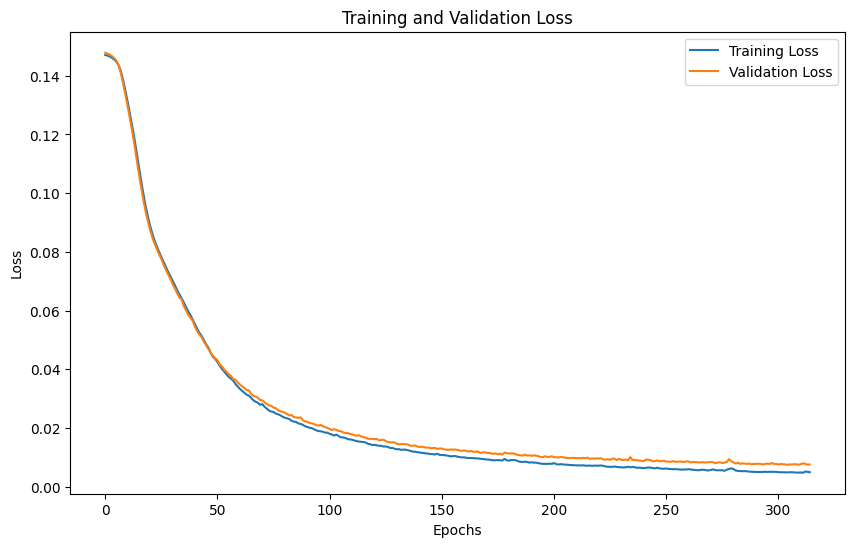

In [26]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test_final, y_test_final)
print(f'Test Loss: {test_loss}')

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [27]:
from tensorflow.keras.models import load_model
model = load_model("C:\\Users\\geork\\projects\\AIThesis\\src\\analysis\\ThesisChapters\\5_4\\5_XYZ_test4\model12.keras")

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions3(initial_seq, true_values, predicted_values, coordinate_name, row):
    # Concatenate the sequences
    initial_and_true = np.concatenate([initial_seq, true_values], axis=0)
    initial_and_pred = np.concatenate([initial_seq, predicted_values], axis=0)
    
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    
    # Plot the true and predicted values on the first subplot
    axs[0].plot(range(len(initial_and_true)), initial_and_true, label='True Values', marker='o')
    axs[0].plot(range(len(initial_and_pred)), initial_and_pred, label='Predicted Values', marker='x')
    axs[0].axvline(x=len(initial_seq)-1, color='r', linestyle='--', label='Prediction Start')
    axs[0].set_title(f'True vs Predicted Values for {coordinate_name}')
    axs[0].set_xlabel('Timesteps')
    axs[0].set_ylabel(f'{coordinate_name} Value')
    axs[0].legend()
    
    # Example of another plot (e.g., residuals or difference between predicted and true values)
    original_timeseries = np.array(row[coordinate_name])
    axs[1].plot(range(len(original_timeseries)), original_timeseries, label="Timeseries")
    axs[1].axvline(x=len(initial_seq)-1, color='r', linestyle='--', label='Prediction Start')
    axs[1].set_title(f'Original {coordinate_name} trajectory')
    axs[1].set_xlabel('Timesteps')
    axs[1].set_ylabel(f'{coordinate_name} Value')
    axs[1].legend()

        # Extract the initial sequence from the DataFrame
    


In [145]:
# Assuming model is trained and X_train, y_train are defined
def scale_with(sequence, y_scaler):
    print(f"Shape: {sequence.shape}")
    return y_scaler.transform(sequence)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


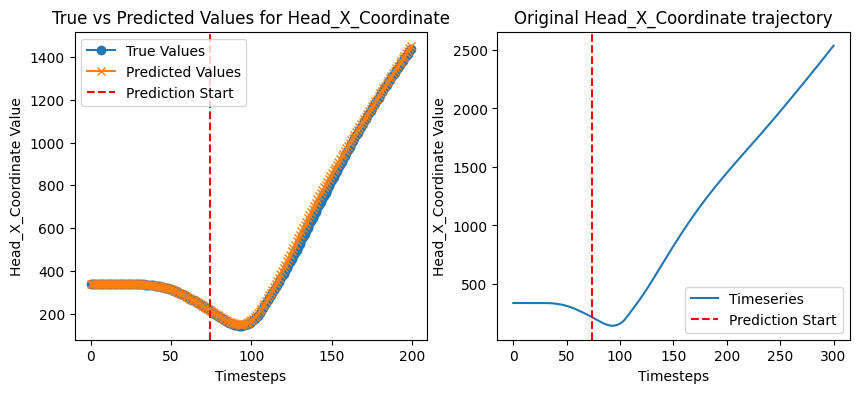

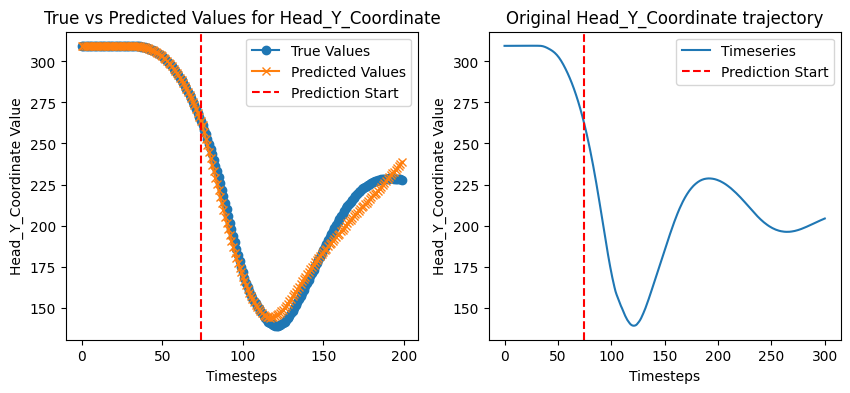

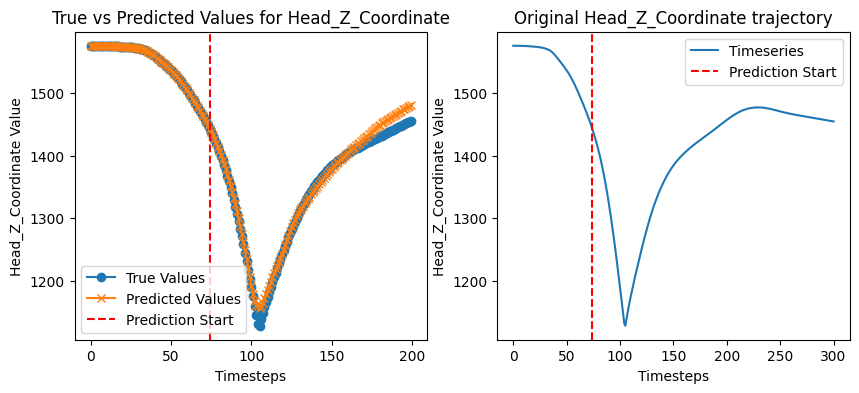

In [33]:
# One coordinate prediction
sample_index = 4

predictions_scaled = model.predict(X_test_scaled)

if y_train.shape[-1] == 1:
    #predictions_scaled = model.predict(X_test_scaled)
    #print(predictions_scaled.shape)
    #print(predictions_scaled[0])
    initial_seq = X_test[sample_index, :, -2]
    print(f"initial seq shape: {initial_seq.shape}")
    initial_seq = initial_seq.reshape((75, 1))
    print(f"initial seq shape: {initial_seq.shape}")
    initial_seq_scaled = scale_with(initial_seq, y_scaler)
    true_values = y_test_scaled[sample_index, :, :]  # True values
    predicted_values = predictions_scaled[sample_index, :, :]  # Predicted values
    # # Plot for Head_X_Coordinate
    plot_predictions3(initial_seq_scaled[:, 0], true_values[:, 0], predicted_values[:, 0], 'Head_Y_Coordinate', test_df.iloc[sample_index])
else:
    X_test_inv_scaled = inverse_transform_feature_wise_data(X_test_scaled, x_scaler)
    X_test_inv_rel = revert_relative_change_y(X_test_inv_scaled, X_test[sample_index][0])

    y_test_inv_scaled = inverse_transform_feature_wise_data(y_test_scaled, y_scaler)
    y_test_inv_rel = revert_relative_change_y(y_test_inv_scaled, y_test[sample_index][0])

    prediction_inv_scaled = inverse_transform_feature_wise_data(predictions_scaled, y_scaler)
    predictions_inv_rel = revert_relative_change_y(prediction_inv_scaled, y_test[sample_index][0])

    plot_predictions3(X_test_inv_rel[sample_index, :, -3], y_test_inv_rel[sample_index, :, 0], predictions_inv_rel[sample_index, :, 0], 'Head_X_Coordinate', test_df.iloc[sample_index])
    # # # # Plot for Head_Y_Coordinate
    plot_predictions3(X_test_inv_rel[sample_index, :, -2], y_test_inv_rel[sample_index, :, 1], predictions_inv_rel[sample_index, :, 1], 'Head_Y_Coordinate', test_df.iloc[sample_index])
    # # # # Plot for Head_Z_Coordinate
    plot_predictions3(X_test_inv_rel[sample_index, :, -1], y_test_inv_rel[sample_index, :, 2], predictions_inv_rel[sample_index, :, 2], 'Head_Z_Coordinate', test_df.iloc[sample_index])
